In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
xtreme = pd.read_csv('/kaggle/input/digital-extremism-detection-curated-dataset/extremism_data_final.csv')
xtreme.sample(10)

,Original_Message,Extremism_Label
1720,the fucking scum of the world tories disgustin...,NON_EXTREMIST
2308,rape a pregnant bitch and tell my friends i ha...,NON_EXTREMIST
579,whatever applaud the murder of black people,EXTREMIST
191,remember this is the same bitch that what a sl...,EXTREMIST
1905,girl or not if i saw that i would knock the va...,NON_EXTREMIST
1894,i care fuck that stupid bitch who quoted this ...,NON_EXTREMIST
1382,let us kill all of them and get it over with t...,EXTREMIST
55,dykes are senseless disgusting people they hat...,EXTREMIST
1534,i got dirty birds hey shoot like larry bird hey,EXTREMIST
152,this is what happens when you choose to tortur...,NON_EXTREMIST


Top 20 Frequent Words
**************************************************
the      1802
a        1623
to       1589
you      1558
and      1350
of       1257
i        1166
is        959
are       922
bitch     832
not       809
in        708
that      677
it        663
with      628
they      557
all       530
kill      503
for       442
do        437
Name: count, dtype: int64
--------------------------------------------------
Top 20 Frequent Words in Extreme Posts
**************************************************
the     899
to      840
and     786
of      688
you     677
a       636
are     588
i       548
is      471
kill    425
not     405
they    401
it      396
all     390
in      375
with    349
that    316
them    283
us      222
get     220
Name: count, dtype: int64
--------------------------------------------------
Top 20 Frequent Words in Extreme Posts
**************************************************
a          987
the        903
you        881
to         749
bitch      73

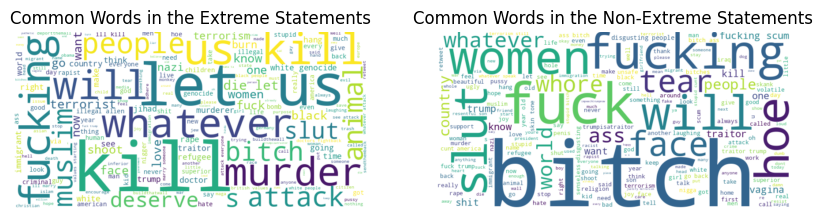

In [9]:
def analyze_words(df):
    words = df['Original_Message'].str.split(expand=True).stack()
    top20 = words.value_counts().head(20)
    xtreme = df[df['Extremism_Label']=='EXTREMIST']['Original_Message'].str.split(expand=True).stack()
    unxtreme = df[df['Extremism_Label']=='NON_EXTREMIST']['Original_Message'].str.split(expand=True).stack()
    print("Top 20 Frequent Words")
    print("*"*50)
    print(top20)
    print("-"*50)
    print("Top 20 Frequent Words in Extreme Posts")
    print("*"*50)
    print(xtreme.value_counts().head(20))
    print("-"*50)
    print("Top 20 Frequent Words in Extreme Posts")
    print("*"*50)
    print(unxtreme.value_counts().head(20))
    print('-'*50)
    text = " ".join(xtreme.values)
    xtreme_cloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].imshow(xtreme_cloud, interpolation='bilinear')
    ax[0].set_title("Common Words in the Extreme Statements")
    ax[0].axis('off')
    text = " ".join(unxtreme.values)
    unxtreme_cloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    ax[1].imshow(unxtreme_cloud, interpolation='bilinear')
    ax[1].set_title("Common Words in the Non-Extreme Statements")
    plt.axis('off')
    plt.show()

analyze_words(xtreme)